In [12]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
# ImageDataGenerator kütüphanesi resimleri toplu değil de sırayla tek tek yükleyerek belleğin daha iyi çalışmasını sağlamaktadır
# Böylece her aşamada bir tane resim okuyarak o resmin öz nitelik haritası çıkarılacaktır

In [2]:
workspace_path = "/Users/ranakaya/Downloads/GoruntuVeriseti/hard-fake-vs-real-faces/"

train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
training_set=train_datagen.flow_from_directory(workspace_path+'train',
                                               target_size=(64,64),
                                               batch_size=32,
                                               class_mode='binary')

validation_datagen=ImageDataGenerator(rescale=1./255,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True)

validation_set=validation_datagen.flow_from_directory(workspace_path+'validation',
                                                      target_size=(64,64),
                                                      batch_size=32,
                                                      class_mode='binary')


Found 901 images belonging to 2 classes.
Found 257 images belonging to 2 classes.


In [5]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_set=test_datagen.flow_from_directory(workspace_path+'test',
                                          target_size=(64,64),
                                          batch_size=32,
                                          class_mode='binary')

Found 131 images belonging to 2 classes.


In [4]:
#Model
cnn =tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [7]:

cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# EarlyStopping callback'i tanımlama
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# cnn.fit(x=training_set,validation_data=validation_set,epochs=20)

# Model eğitimi
history = cnn.fit(
    x=training_set,
    validation_data=validation_set,
    epochs=20,
    callbacks=[early_stopping]
)

Epoch 1/20
29/29 [==============================] - 4s 109ms/step - loss: 0.0046 - accuracy: 0.9978 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 2/20
29/29 [==============================] - 3s 93ms/step - loss: 0.0031 - accuracy: 0.9989 - val_loss: 3.9357e-04 - val_accuracy: 1.0000
Epoch 3/20
29/29 [==============================] - 3s 96ms/step - loss: 8.4394e-04 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 4/20
29/29 [==============================] - 3s 112ms/step - loss: 0.0139 - accuracy: 0.9945 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 5/20
29/29 [==============================] - 3s 99ms/step - loss: 7.0861e-04 - accuracy: 1.0000 - val_loss: 1.7375e-04 - val_accuracy: 1.0000
Epoch 6/20
29/29 [==============================] - 3s 94ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 5.0039e-04 - val_accuracy: 1.0000
Epoch 7/20
29/29 [==============================] - 3s 111ms/step - loss: 3.8702e-04 - accuracy: 1.0000 - val_loss: 4.8551e-05 - val

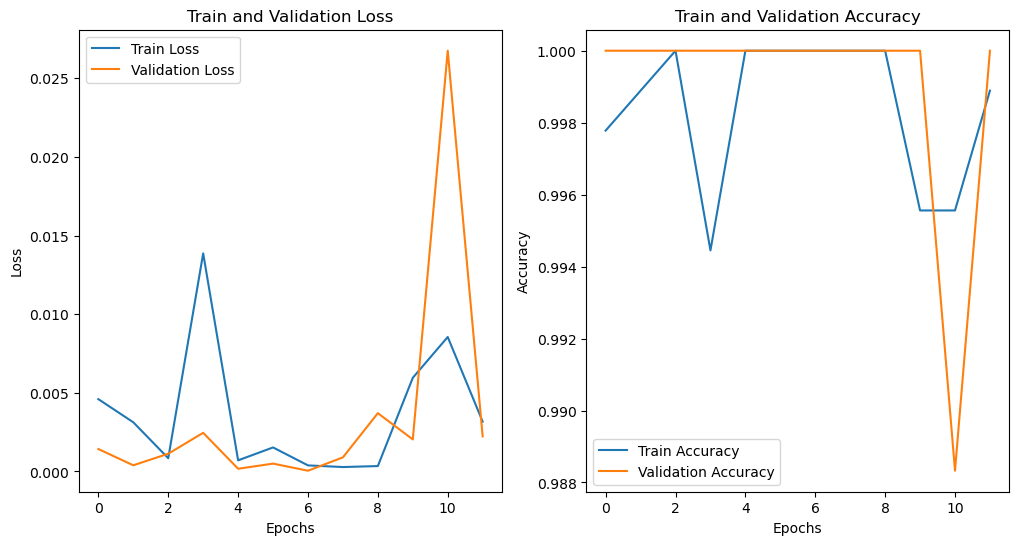

In [10]:
# Eğitim sonuçlarını grafiğe dökme
plt.figure(figsize=(12, 6))

# Eğitim ve doğrulama kaybı
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Eğitim ve doğrulama doğruluğu
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [27]:
# Test veri seti üzerinde tahmin yapma
y_pred = cnn.predict(test_set)
y_pred = (y_pred > 0.5).astype(int)  # Tahmin edilen olasılıkları binary sınıflara çevirme

# Gerçek değerler
y_true = test_set.classes
y_true = (y_true > 0.5).astype(int) 

print(y_pred)
print('-----------------------------------------------------------')
print(y_true)

5/5 [==============================] - 0s 36ms/step
[[0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]
-----------------------------------------------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 

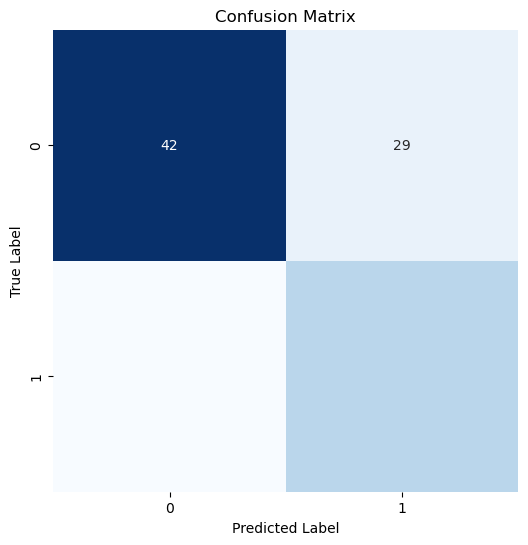

In [28]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix oluşturma
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix'i görselleştirme
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [29]:
print(cm)

[[42 29]
 [28 32]]
